In [4]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../')

from glyphs.core import GlyphPath,GridExplorer
from glyphs.visualization import render_multipath_fill, render_skeleton, render_path_debug,render_multipath_lines
import numpy as np
import pandas as pd



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Recreating glyphs


<img src="example_path.png" width="500"/>


# building skeletons

Order of operations :
1. Pick a starting location on grid
2. Recursively connect to neighbors
3. abandon recursion if 
        --> we run into a point we've already been to that ISN'T the starting point
        --> we paint ourselves into a corner
4. Sucessfull skeleton cycle is achieved when it reconnects with starting location
5. We dedup skeletons that hit all the same locations (regardless of ordering)
 

In [5]:
size = 5
explorer = GridExplorer(size)
explorer.explore_closed_cylces()
explorer.save_cycles_to_csv(save_location='grid_size5_skeletons.csv')

100%|█████████████████████████████████████████████████████| 25/25 [03:09<00:00,  7.56s/it]
2023-04-30 10:55:21,357 glyphs.core INFO:total number of unique skeletons prior to dedup 326624
2023-04-30 10:55:22,266 glyphs.core INFO:total number of unique skeletons post dedup 6852


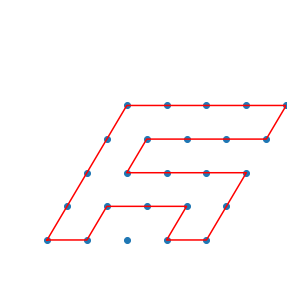

In [6]:
path_idx = 4

fig = render_skeleton(explorer.all_paths[path_idx])

# Adding hexagon kernals

In [7]:
#adding rotating kernals
rotations = np.random.choice(2, size ** 2).reshape((size, size))
rotations

array([[1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 1, 1],
       [0, 0, 0, 0, 1]])

In [8]:
glyph_path = GlyphPath(explorer.all_paths[path_idx], rotations)
glyph_path.run_all()
result_series = glyph_path.return_series()
result_series

is_crossing                                                False
area                                                    9.237598
concavity                                               0.369504
distance                                                    24.0
solidity                                                  0.3849
all_points     [(-0.1667, -0.2887), (-0.3333, 0.0), (-0.1667,...
grid           [[1.0, 2.0, 3.0, 4.0, 5.0], [24.0, 23.0, 14.0,...
rotations      [[1, 0, 1, 1, 1], [0, 0, 0, 0, 0], [1, 0, 1, 0...
dtype: object

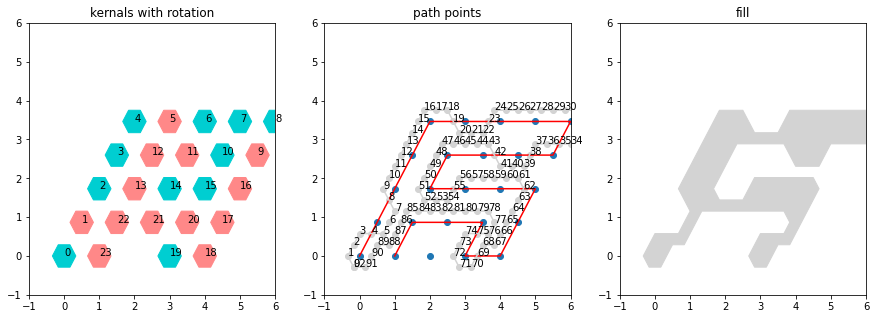

In [9]:
render_path_debug(glyph_path)


# Creating multiple glyphs



num_unique_cycles * 2**(length_of_cylces)


In [12]:
from tqdm import tqdm

successful_cylces = []
glyph_path_list = []

index = 0
target_value = 5000
with tqdm(total=target_value) as pbar:
    
    while len(successful_cylces) < target_value:
        index = (index + 1) % len(explorer.all_paths)

        rotations = np.random.choice(2, size ** 2).reshape((size, size))
        glyph_path = GlyphPath(explorer.all_paths[index], rotations)
        glyph_path.run_all()
        result_series = glyph_path.return_series()
        if not result_series['is_crossing']:
            successful_cylces.append(result_series)
            glyph_path_list.append(glyph_path)
            pbar.update(1)
result_df = pd.DataFrame(successful_cylces)
result_df['glyph_objects'] = glyph_path_list

100%|█████████████████████████████████████████████████| 5000/5000 [01:46<00:00, 46.82it/s]


In [423]:
# compare by solidity 

lowest solidity
highest solidity


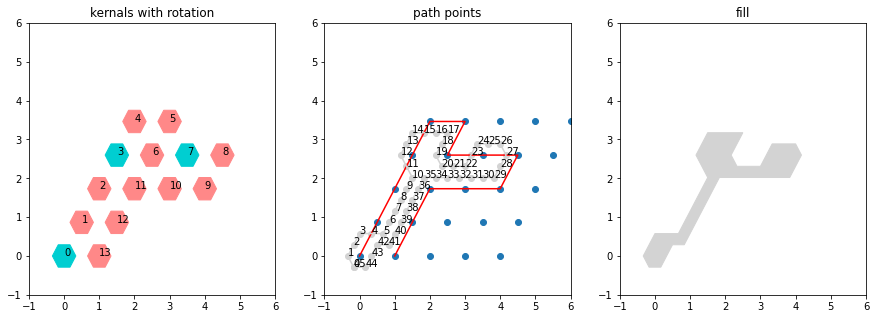

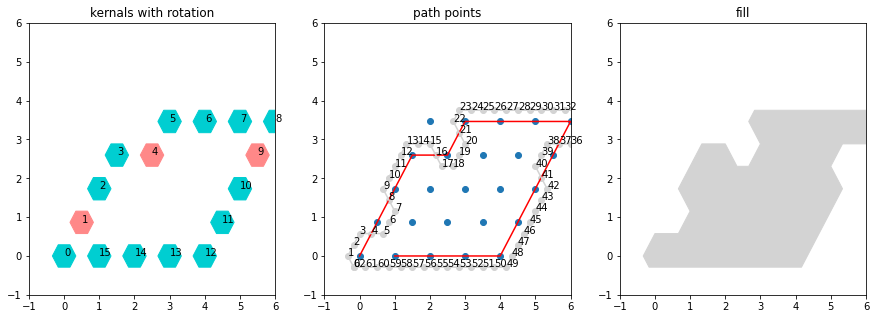

In [424]:
sorted_df =result_df.sort_values(by='solidity')

print('lowest solidity')
lowest_solidity = sorted_df['glyph_objects'].values[0]

render_path_debug(lowest_solidity)

print('highest solidity')

highest_solidity = sorted_df['glyph_objects'].values[-1]

render_path_debug(highest_solidity)


lowest distance
highest distance


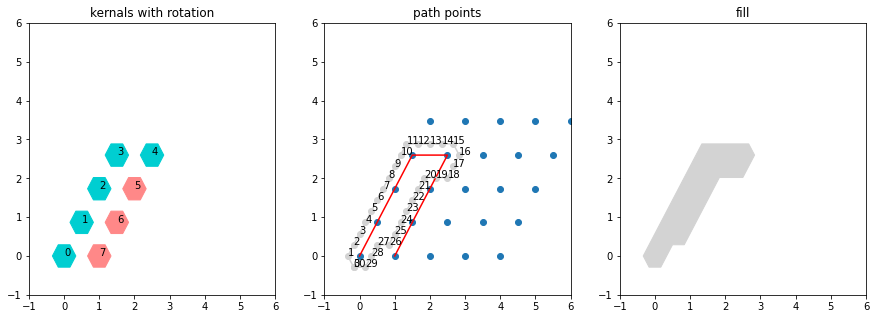

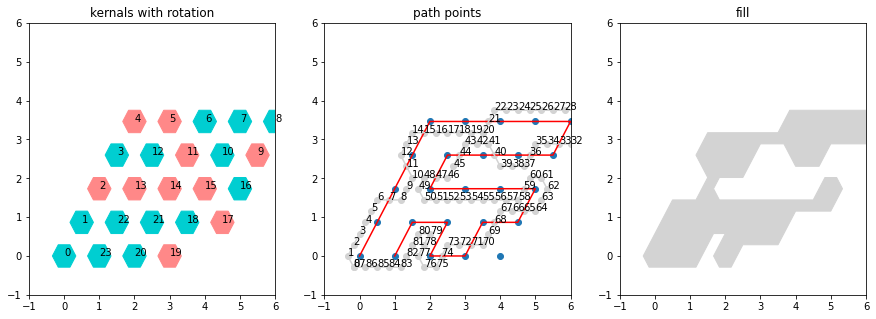

In [425]:
sorted_df =result_df.sort_values(by='distance')

print('lowest distance')
lowest_solidity = sorted_df['glyph_objects'].values[0]

render_path_debug(lowest_solidity)

print('highest distance')

highest_solidity = sorted_df['glyph_objects'].values[-1]

render_path_debug(highest_solidity)

# multiple plots

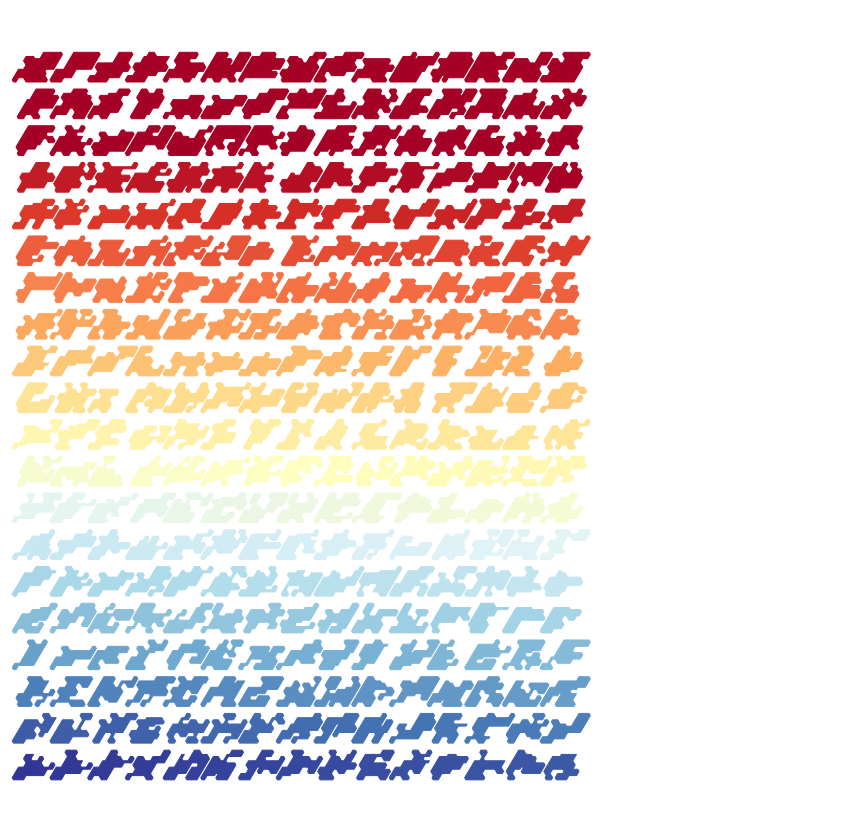

In [437]:
sorted_df =result_df.sort_values(by='concavity')
glyphs = sorted_df.tail(300)['glyph_objects'].values.tolist()

render_multipath_fill(glyphs,save_location ='full_ex.png')

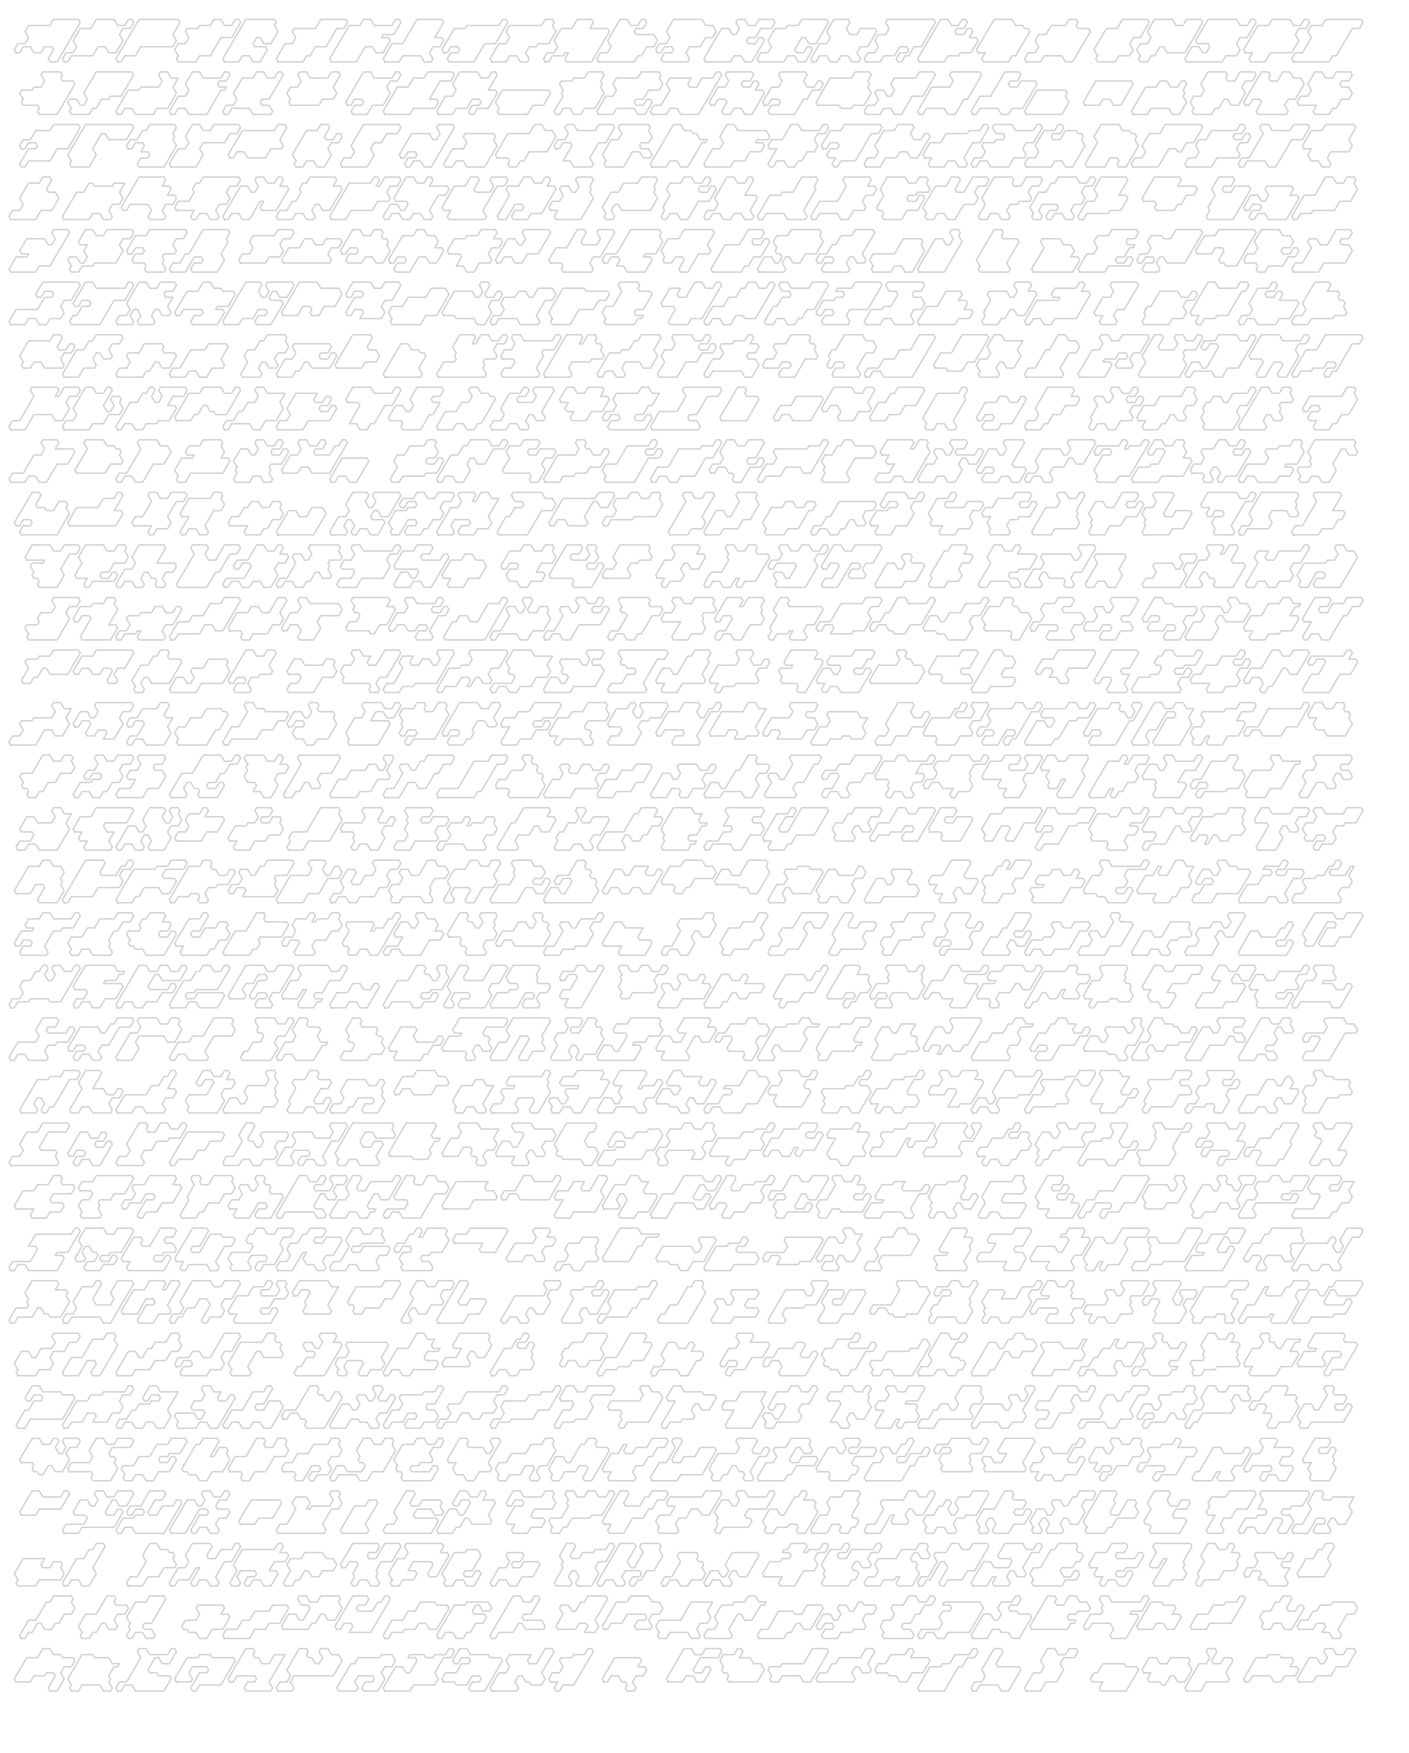

In [27]:
sorted_df =result_df.sort_values(by='solidity')
glyphs = sorted_df.tail(800)['glyph_objects'].values.tolist()
render_multipath_lines(glyphs,save_location ='new_800.svg')

# Next steps
* assemble glyphs in way that resembles natural language
* create longest possible path with greatest number of convolutions
* remove nubblies 


In [402]:
result_df['glyph_objects'].values.tolist()